In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import braycurtis

In [10]:
# Load the data
df = pd.read_excel('../data/processed/coprolitos_processed.xlsx')

# Inspeccionar primeros elementos
df.head()

,Ejemplar,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
0,bump headed lace,4,2,1,1,1,2,5
1,bump headed lace,4,2,2,1,1,2,3
2,circular,1,2,1,1,1,4,5
3,circular,3,2,2,1,2,4,5
4,cilíndrico,1,2,1,1,3,1,5


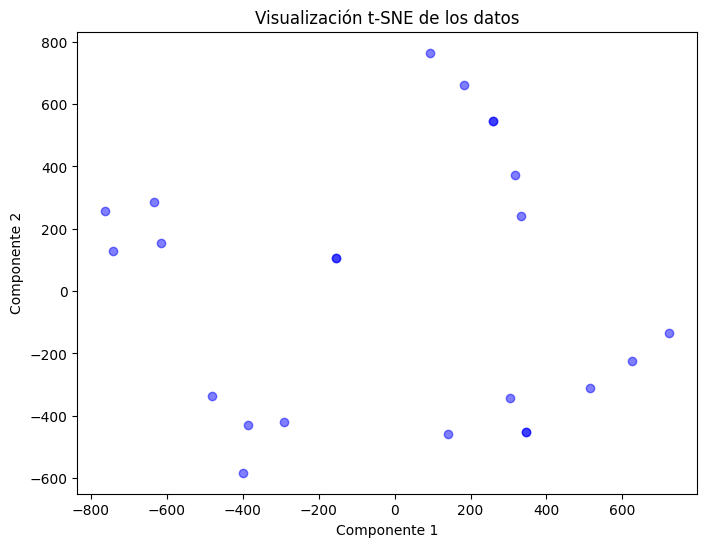

In [12]:
# Crear una instancia de TSNE con el número deseado de componentes (usualmente 2 o 3)
tsne = TSNE(n_components=2, perplexity=2, random_state=42)

# Aplicar TSNE al conjunto de datos
X_tsne = tsne.fit_transform(df.drop("Ejemplar", axis = 1))
df_tsne = pd.DataFrame(X_tsne, columns = ["Componente 1", "Componente 2"])

# Visualizar los datos en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='b', alpha=0.5)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización t-SNE de los datos')
plt.show()

In [13]:
df_tsne['Ejemplar'] = df['Ejemplar'].str.title()
df_tsne.head()

,Componente 1,Componente 2,Ejemplar
0,-741.750183,129.139160,Bump Headed Lace
1,723.052124,-135.102448,Bump Headed Lace
2,-400.315063,-582.527893,Circular
3,-386.748444,-430.425995,Circular
4,-155.270340,106.622681,Cilíndrico


In [14]:
abbreviation_dict = {
    'Bump Headed Lace': 'BHL',
    'Circular': 'Cir',
    'Cilíndrico': 'Cil',
    'Cono': 'Cono',
    'Elipsoidal': 'Elip',
    'Elongado': 'Elon',
    'Forma De Pino': 'FP',
    'Irregular': 'Irr',
    'Forma De Rosario': 'FR',
    'Espiral': 'Esp',
    'Forma De Encaje Recto': 'FER',
    'Encaje Delgado': 'ED'
}

df_tsne['Ejemplar'] = df_tsne['Ejemplar'].replace(abbreviation_dict)


In [15]:
df_tsne

,Componente 1,Componente 2,Ejemplar
0,-741.750183,129.139160,BHL
1,723.052124,-135.102448,BHL
2,-400.315063,-582.527893,Cir
3,-386.748444,-430.425995,Cir
4,-155.270340,106.622681,Cil
5,-292.489899,-420.255157,Cil
6,-155.270340,106.622681,Cil
7,-481.688324,-337.478577,Cil
8,182.736130,661.982971,Cono
9,139.396103,-459.175903,Elip


## DBSCAN

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import braycurtis

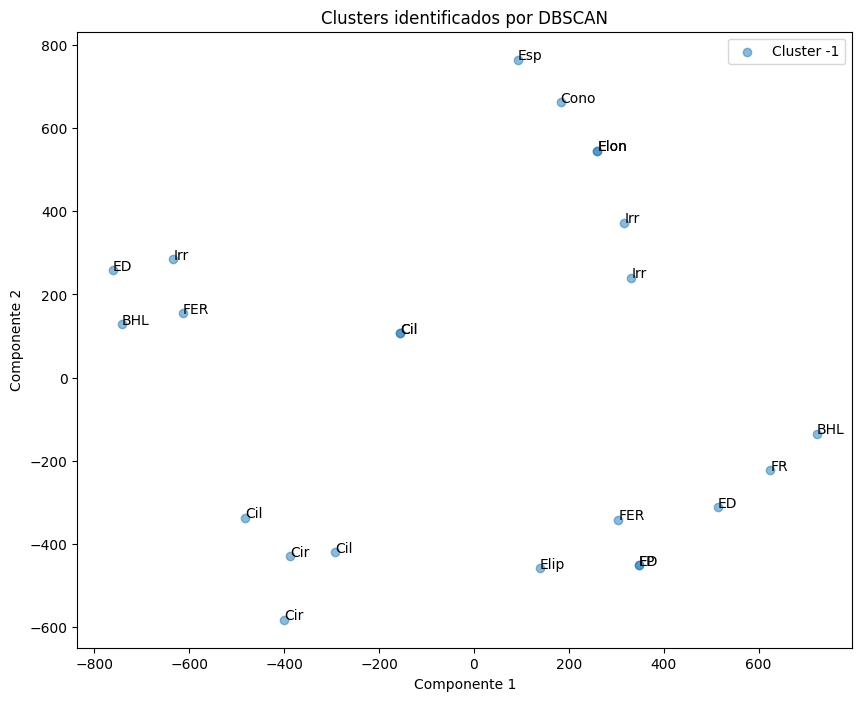

In [17]:
# Seleccionar características relevantes para DBSCAN
X = df_tsne[['Componente 1', 'Componente 2']]

# Instanciar y ajustar DBSCAN con métrica de Bray-Curtis
dbscan = DBSCAN(eps=0.037, min_samples=3, metric=braycurtis)
labels = dbscan.fit_predict(X)

# Agregar etiquetas de clusters al DataFrame original
df_tsne['Cluster'] = labels

# Crear una figura y ejes
plt.figure(figsize=(10, 8))

# Graficar los puntos con colores según los clusters y etiquetas
for label in np.unique(labels):
    clustered_points = df_tsne[df_tsne['Cluster'] == label]
    plt.scatter(clustered_points['Componente 1'], clustered_points['Componente 2'], label=f'Cluster {label}', alpha=0.5)
    for i, txt in enumerate(clustered_points['Ejemplar']):
        plt.annotate(txt, (clustered_points['Componente 1'].iloc[i], clustered_points['Componente 2'].iloc[i]))

# Añadir leyenda y etiquetas de ejes
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clusters identificados por DBSCAN')
plt.legend()
plt.show()

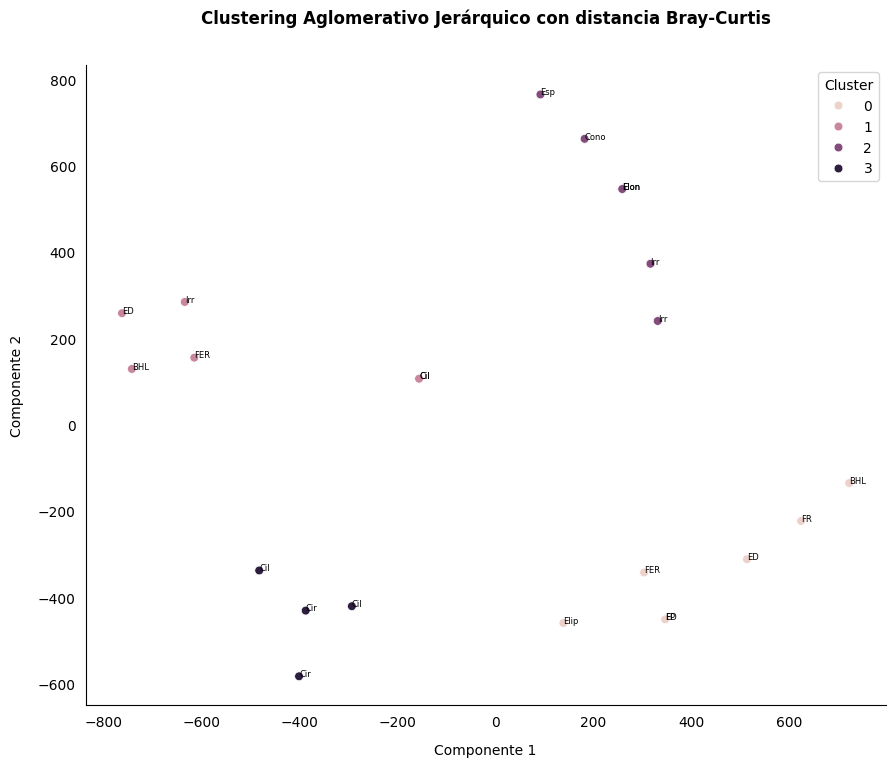

In [20]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Selección del número de clusters
optimal_clusters = 4  # Basado en la observación del dendrograma

# Aplicar AgglomerativeClustering con el número óptimo de clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, metric='braycurtis', linkage='complete')
df_tsne['Cluster'] = agg_clustering.fit_predict(df_tsne[['Componente 1', 'Componente 2']])

# Crear la figura y los ejes para la gráfica de dispersión
fig, ax = plt.subplots(figsize=(10, 8))  # Aumenta el tamaño de la figura

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_tsne, s=40, ax=ax, legend='full')

# Añadir etiquetas a cada punto
for i in range(len(df_tsne)):
    ax.text(df_tsne['Componente 1'][i] + 0.05, df_tsne['Componente 2'][i], df_tsne['Ejemplar'][i], fontsize=6)  # Reduce el tamaño de la fuente

ax.set_title('Clustering Aglomerativo Jerárquico con distancia Bray-Curtis', pad=30, fontweight='bold')
ax.set_xlabel('Componente 1', labelpad=10)
ax.set_ylabel('Componente 2', labelpad=10)

# Desactivar las marcas en el eje x de la subgráfica inferior
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
# Desactivar las marcas en el eje y de la subgráfica inferior
ax.tick_params(axis='y', which='both', left=False)
# Mantener solo el borde izquierdo y inferior de la subgráfica inferior
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar los márgenes de la figura
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

